# Clustering 

- Perform Clustering for the crime data
- Identify the number of clusters formed
- Draw inferences.

Data Description:

|Features|Description|
|:----|:----|
|Murder|Muder rates in different places of United States|
|Assualt|Assualt rate in different places of United States|
|UrbanPop|urban population in different places of United States|
|Rape|Rape rate in different places of United States|


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('crime_data.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
# remove insignificant columns
X = df.drop(columns='Unnamed: 0')

In [4]:
X.duplicated().sum()

0

In [5]:
X.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


### K-Means Clustering
K-Means clustering is unsupervised machine learning algorithm which identifies similarly placed datapoints or clusters/patterns/structures within a dataset.

K-means clustering randomly initialises centroids, assign each of the datapoint to 'closest' centroid. The term closest is ambiguous as it is based on 'distance', **distance** can have different metrics. The geometrical distance is called euclidian. 
Centroid positions are then updated by calculating the true center of gravity. Then the datapoints are reassigned. The process is repeated iteratively until the model converges. 

K-means clustering is susceptible to **random initialisation trap** (the initialisation of centroids dictates the outcome of algorithm). This trap may not give us best possible clusters. To overcome this issue we use k-means++ as solution.

Finding the **optimum number of clusters (K)**: The metrics we use to optimize K values is WCSS (within class sum of squares). The sum of squares of distance of each datapoint within the cluster from cluster's centroid is calculated for all clusters. The total for all clusters is WCSS. Overall WCSS decreases with increasing number of clusters forming an elbow shaped plot. Elbow method is arbitrary dependent on individual judgement on which one is optimal for analysis.

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [26]:
# K-means is a distance based algorithm, hence we need to scale our data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

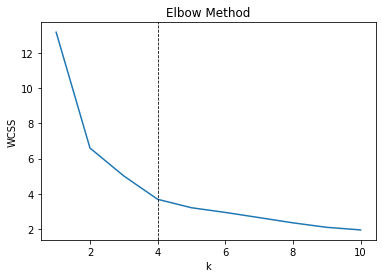

In [28]:
# Finding optimal number of clusters - elbow method
from sklearn.cluster import KMeans
wcss = []
for n_clusters in range(1,11):
    model = KMeans(n_clusters=n_clusters,random_state=42) # kmeans++ init to overcome random initialisation trap
    model.fit(X)
    wcss.append(model.inertia_)

plt.plot(range(1,11),wcss)
plt.axvline(x=4,color='k',ls='--',lw=0.8)
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('WCSS');

# optimum nunber of cluster is 4

In [32]:
model = KMeans(n_clusters=4,random_state=42)
cluster = model.fit_predict(X) # model.fit(X) + model.labels_

In [33]:
df['Cluster'] = pd.Series(cluster)
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3


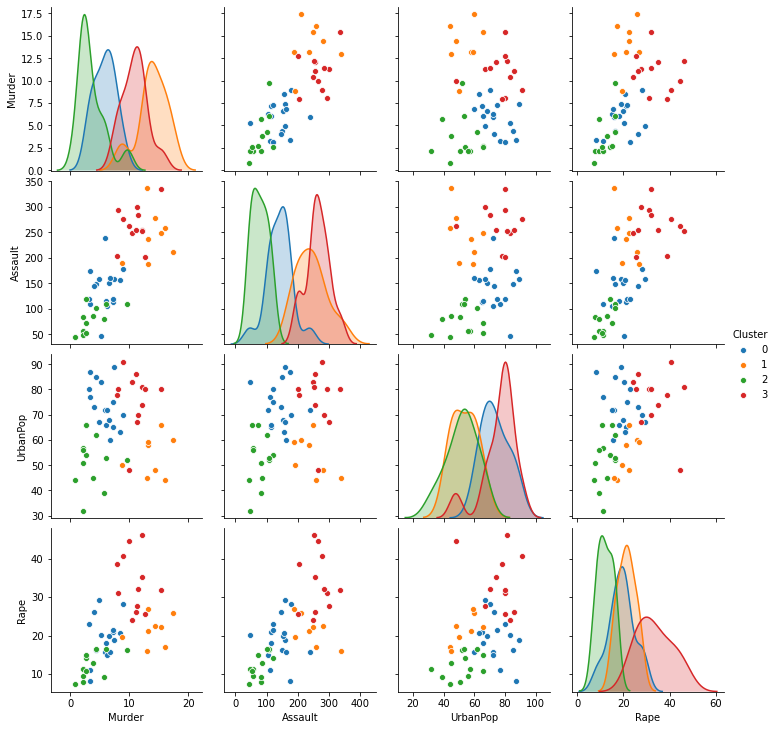

In [34]:
sns.pairplot(data=df,hue='Cluster');

In [ ]:
# We see our clusters are mainly based majorly on number of cases of murder, Assualt followed by rape and UrbanPop

In [5]:
# Let's modify our features for better inferences
X_df = df[['UrbanPop']]
X_df['Crimes'] = df['Rape'] + df['Murder'] + df['Assault']

<ipython-input-5-11733ee69c6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df['Crimes'] = df['Rape'] + df['Murder'] + df['Assault']


In [6]:
X_df.head()

,UrbanPop,Crimes
0,58,270.4
1,48,317.5
2,80,333.1
3,50,218.3
4,91,325.6


<ipython-input-48-40a250a96116>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df['Cluster'] = pd.Series(cluster)


,UrbanPop,Crimes,Cluster
0,58,270.4,3
1,48,317.5,3
2,80,333.1,0
3,50,218.3,3
4,91,325.6,0


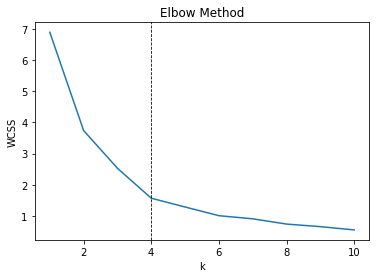

In [48]:
# K-means is a distance based algorithm, hence we need to scale our data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_df)

# Finding optimal number of clusters - elbow method
from sklearn.cluster import KMeans
wcss = []
for n_clusters in range(1,11):
    model = KMeans(n_clusters=n_clusters,random_state=42) # kmeans++ init to overcome random initialisation trap
    model.fit(X)
    wcss.append(model.inertia_)

plt.plot(range(1,11),wcss)
plt.axvline(x=4,color='k',ls='--',lw=0.8)
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('WCSS');

# optimum nunber of cluster is 4

model = KMeans(n_clusters=4,random_state=42)
cluster = model.fit_predict(X) # model.fit(X) + model.labels_

X_df['Cluster'] = pd.Series(cluster)
X_df.head()

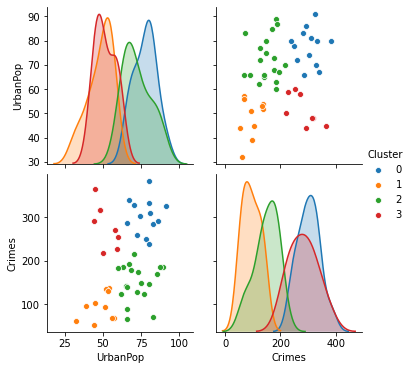

In [49]:
sns.pairplot(data=X_df,hue='Cluster');

### Hierarchical clustering
Agglomerative clustering: Recursively merges the pair of clusters that minimally increases a given linkage distance.

Hierarchical clustering is unsupervised learning algorithm which identifies structures/patterns/clusters in a dataset just like K-Means, however using a different methodology.

There are 2 types: 
    - Agglomerative: starting from bottom eventually building up to the top
    - Devisive: starting at the top and devising clusters into multiple 

We consider each datapoint as cluster. Combine two closest datapoints to form a N-1 clusters. Then after combine two closest 'clusters' to form N-2 clusters. Keep repeating till we form a single cluster or till algorithm converges. The course is recorded in dendogram. Height represents euclidian distance between clusters (measure of dissimilarity). We can set dissimilarity threshold to create clusters. Number of vertical lines our horizontal threshold line crosses is equal to number of clusters. Optimal threshold (no of clusters). Longest vertical line that doesn't cross any horizontal line.

Measuring distance between datapoints:
Euclidian - geometrical distance
Manhattan, Minkowski etc

Measuring distance between the clusters:
- option 1: closest points (single linkage method)
- option 2: furthest points (complete or maximum linkage method)
- option 3: Average distance (average linkage method)
- option 4: centroids distance/ minimize variance (ward linkage method) when using euclidean distance only ward is accepted
Dependent on problem case

refer: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

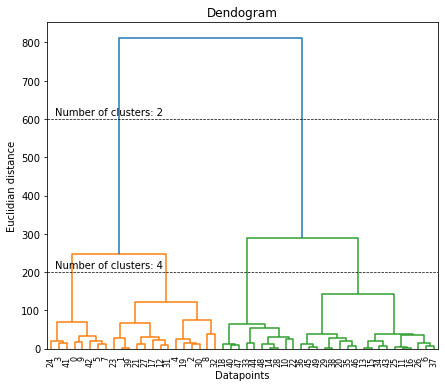

In [20]:
# optimising number of clusters by observing dendrogram

plt.figure(figsize=(7,6))
from scipy.cluster import hierarchy
hierarchy.dendrogram(hierarchy.linkage(X_df,method='ward'))
plt.xlabel('Datapoints')
plt.ylabel('Euclidian distance')
plt.title('Dendogram')

# We observe number of clusters formed is 2 represented by orange and green color on the dendogram
# orange and green clusters can be further divided to form 4 clusters, which seems to be optimal (same as in K-Means)

plt.axhline(y=200,ls='--',color='k',lw=0.7)
plt.annotate('Number of clusters: 4',xy=(10,210))
plt.axhline(y=600,ls='--',color='k',lw=0.7)
plt.annotate('Number of clusters: 2',xy=(10,610));

In [ ]:
# Let's implement hierarchical clustering algorithm
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X_df)

In [36]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster = model.fit_predict(X)

X_df['Cluster'] = pd.Series(cluster) # model.labels_
X_df.head()

<ipython-input-36-d18f2d439d61>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df['Cluster'] = pd.Series(cluster) # model.labels_


,UrbanPop,Crimes,Cluster
0,58,270.4,0
1,48,317.5,0
2,80,333.1,0
3,50,218.3,2
4,91,325.6,0


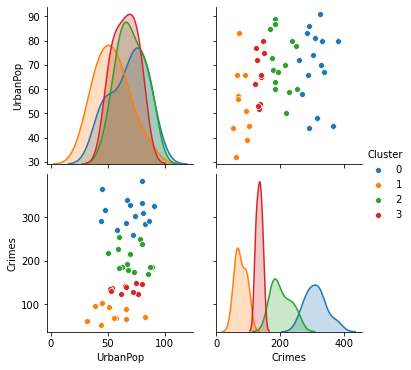

In [37]:
sns.pairplot(data=X_df,hue='Cluster');

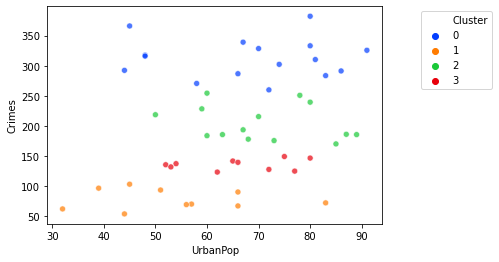

In [40]:
#fig,axes= plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(data=X_df,x='UrbanPop',y='Crimes',hue='Cluster',alpha=0.7,palette='bright')
plt.legend(bbox_to_anchor=(1.1,1));

In [ ]:
# We see although the number of clusters are same. Clusters formed have different attributes.
# hierarchical clustering seems to weigh 'crimes' feature more. Cluster formed on the basis of number of crimes divided 
#into 4 categories
# K-means have clustered on the basis of number of crimes into 2 groups and further on the basis of urban population into 
#2 groups forming in total 4 categories

#Depending on our use case and problem objective we may opt to use either of clustering algorithm

### DBSCAN- Density Based Spatial Clustering of Algorithm with Noise

Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density.
No need to specify number of clusters in advance. Can find clusters within a cluster/non linearly separable/arbitarily shaped clusters. Robust to outliers. Converges faster.

Parameters: threshold distance, minimum number of neighbors

Not entirely deterministic, border points that are reachable from more than one cluster can be part of either cluster depending on the order in which data is processed.
Relies heavily on distance measure which user specifies, in higher dimensions it becomes difficult-if data and scale is not understood choosing a meaningful epsilon becomes difficult.
Susceptible to curse of dimensionality

Find datapoints that are not separated more than threshold distance epsilon. We hop from one node to another by hopping not more than epsilon threshold distance, all such accessible nodes becomes the part of cluster. At the end there may be some points that are not the part of any cluster. We have random initialization of algorithm

Refer: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [4]:
X_df = df[['UrbanPop']]
X_df['Crimes'] = df['Rape'] + df['Murder'] + df['Assault']

<ipython-input-4-d28b9435d18a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df['Crimes'] = df['Rape'] + df['Murder'] + df['Assault']


In [5]:
X_df.head()

,UrbanPop,Crimes
0,58,270.4
1,48,317.5
2,80,333.1
3,50,218.3
4,91,325.6


In [5]:
# Let's implement hierarchical clustering algorithm
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_df)

In [6]:
from sklearn.cluster import DBSCAN
for d in np.arange(0.025,0.3,0.05):
    for n in range(1,5):
        model = DBSCAN(eps=d,min_samples=n)
        model.fit(X)
        labels = model.labels_
        print(f'threshold distance:{round(d,3)}     Number of samples:{n}     labels:{np.unique(labels).tolist()}')

threshold distance:0.025     Number of samples:1     labels:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
threshold distance:0.025     Number of samples:2     labels:[-1, 0, 1, 2, 3]
threshold distance:0.025     Number of samples:3     labels:[-1, 0]
threshold distance:0.025     Number of samples:4     labels:[-1]
threshold distance:0.075     Number of samples:1     labels:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
threshold distance:0.075     Number of samples:2     labels:[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
threshold distance:0.075     Number of samples:3     labels:[-1, 0, 1, 2]
threshold distance:0.075     Number of samples:4     labels:[-1]
threshold distance:0.125     Number of samples:1     labels:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
threshold distance:0.12

<ipython-input-7-e4caa9c05230>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df['Crimes'] = df['Rape'] + df['Murder'] + df['Assault']
<ipython-input-7-e4caa9c05230>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df['Cluster'] = pd.Series(cluster) # model.labels_


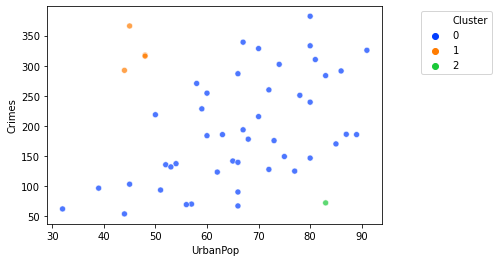

In [7]:
# it seems epsilon 0.175,0.125,0.075,0.025 and min_samples 1,4,3,2 respectively work well
# Let's visualise them all
X_df = df[['UrbanPop']]
X_df['Crimes'] = df['Rape'] + df['Murder'] + df['Assault']
model = DBSCAN(eps=0.175,min_samples=1)
cluster = model.fit_predict(X)

X_df['Cluster'] = pd.Series(cluster) # model.labels_
X_df.head()
sns.scatterplot(data=X_df,x='UrbanPop',y='Crimes',hue='Cluster',alpha=0.7,palette='bright')
plt.legend(bbox_to_anchor=(1.1,1));

<ipython-input-14-50d9f26fc0f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df['Crimes'] = df['Rape'] + df['Murder'] + df['Assault']
<ipython-input-14-50d9f26fc0f8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df['Cluster'] = pd.Series(cluster) # model.labels_


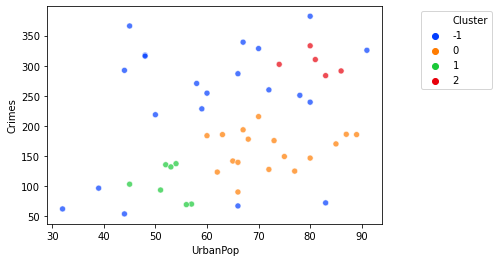

In [14]:
X_df = df[['UrbanPop']]
X_df['Crimes'] = df['Rape'] + df['Murder'] + df['Assault']
model = DBSCAN(eps=0.125,min_samples=4)
cluster = model.fit_predict(X)

X_df['Cluster'] = pd.Series(cluster) # model.labels_
X_df.head()
sns.scatterplot(data=X_df,x='UrbanPop',y='Crimes',hue='Cluster',alpha=0.7,palette='bright')
plt.legend(bbox_to_anchor=(1.1,1));

In [ ]:
# DBSCAN doesnt seem to perform as good as other clustering algorithm on our dataset.

# Thank you!